# Chapter 01, Section 2, in Java
### Finding a good deal

In [1]:
%maven org.knowm.xchart:xchart:3.7.0
import org.knowm.xchart.*;
import org.knowm.xchart.style.*;
import org.knowm.xchart.style.markers.SeriesMarkers;
import org.knowm.xchart.style.colors.XChartSeriesColors;
import static org.knowm.xchart.XYSeries.XYSeriesRenderStyle;
import java.awt.BasicStroke;

In [2]:
double[] mileages = new double[] { 4.1429, 8.9173, 6.5, 6.0601, 12.3, 6.2, 2.5782, 0.9, 1.7, 13.1045, 24.7, 9.2699, 17.2, 10.0, 10.0, 2.8, 12.3773, 19.6, 7.3397, 2.1178, 12.9886, 10.9884, 16.9, 6.0, 12.9, 8.1936, 10.5, 8.0713, 1.7, 10.0, 15.6097, 17.0, 16.7, 5.6, 11.3, 19.9, 9.6, 21.6, 20.3 };
double[] prices = new double[] {16980.0, 15973.0, 9900.0, 15998.0, 3900.0, 12540.0, 21688.0, 17086.0, 23000.0, 8900.0, 3875.0, 10500.0, 3500.0, 26992.0, 17249.0, 19627.0, 9450.0, 3000.0, 14999.0, 24990.0, 7967.0, 7257.0, 4799.0, 13982.0, 5299.0, 14310.0, 7800.0, 12250.0, 23000.0, 14686.0, 7495.0, 4950.0, 3500.0, 11999.0, 9600.0, 1999.0, 4300.0, 3500.0, 4200.0};

In [3]:
private static double price(double mileage) {
    return 26500 * Math.pow(0.905, mileage);
}

In [4]:
List<Double> xList = new ArrayList<>();
for (int x=0; x<=25; x++) {
  xList.add((double)x);
}
double[] xs = xList.stream()
                   .mapToDouble(Double::doubleValue)
                   .toArray();

List<Double> yList = new ArrayList<>();
for (int x=0; x<xs.length; x++) {
  yList.add(price(xs[x]));
}
double[] ys = yList.stream()
                   .mapToDouble(Double::doubleValue)
                   .toArray();

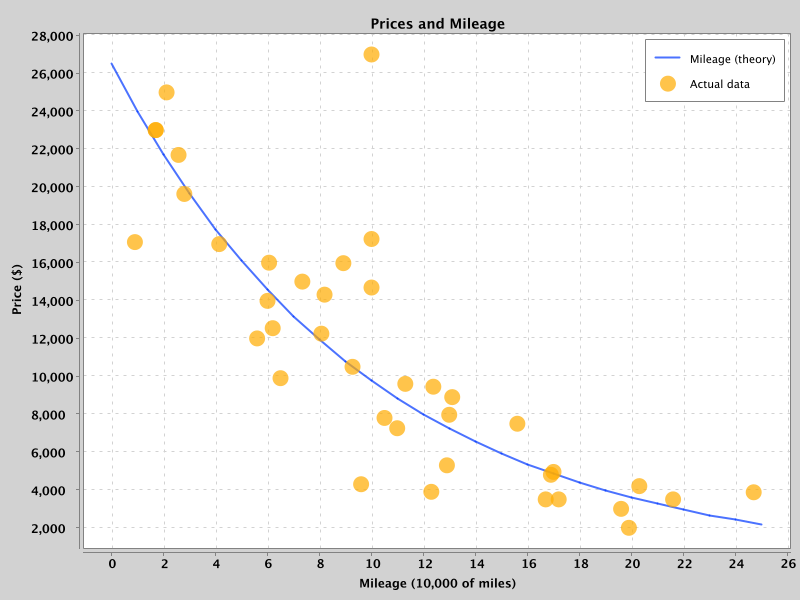

In [5]:
// Plot the data
XYChart chart = new XYChartBuilder()
                         .width(800)
                         .height(600)
                         .title("Prices and Mileage")
                         .xAxisTitle("Mileage (10,000 of miles)")
                         .yAxisTitle("Price ($)")
                         .build();
 
// Customize Chart
chart.getStyler().setLegendPosition(Styler.CardinalPosition.InsideNE);
chart.getStyler().setDefaultSeriesRenderStyle(XYSeriesRenderStyle.Line);

XYSeries seriesLiability = chart.addSeries("Mileage (theory)", xs, ys);
seriesLiability.setMarker(SeriesMarkers.NONE);
seriesLiability.setXYSeriesRenderStyle(XYSeries.XYSeriesRenderStyle.Line);

// Scattered data
XYSeries scattered = chart.addSeries("Actual data", mileages, prices);
scattered.setMarker(SeriesMarkers.CIRCLE);
chart.getStyler().setDefaultSeriesRenderStyle(XYSeriesRenderStyle.Scatter);
chart.getStyler().setMarkerSize(16);

// Render the chart
BitmapEncoder.getBufferedImage(chart);

In [6]:
double targetMileage = Math.log(10 / 26.5) / Math.log(0.905);
double targetPrice = price(targetMileage);
System.out.println(String.format("Target %f (10,000s of miles), price: %.02f$", targetMileage, targetPrice));

Target 9.763137 (10,000s of miles), price: 10000.00$


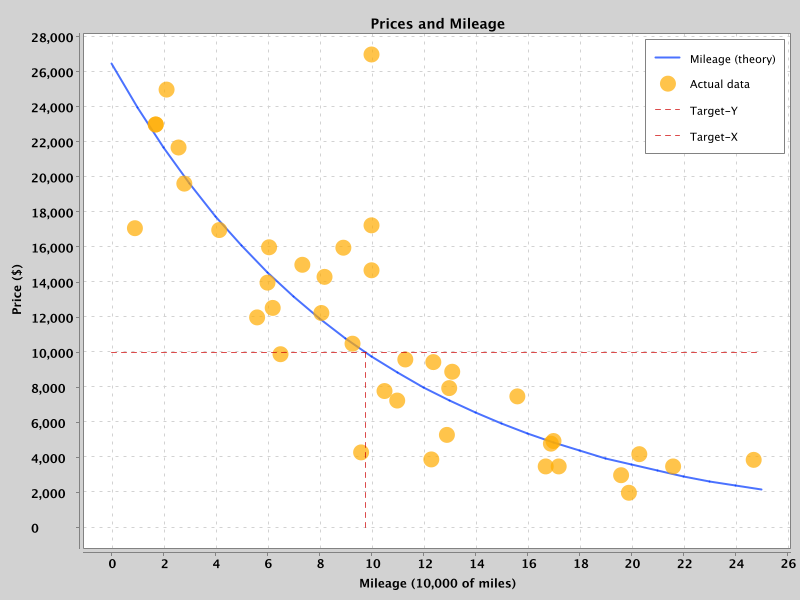

In [7]:
double xTargetFrom = 0;
double xTargetTo   = 25;
BasicStroke dottedStroke = new BasicStroke(1f, BasicStroke.CAP_ROUND, BasicStroke.JOIN_ROUND, 1f, new float[]{5f, 5f}, 0f);

XYSeries target1 = chart.addSeries("Target-Y", new double[] {xTargetFrom, xTargetTo}, new double[] {targetPrice, targetPrice});
target1.setMarker(SeriesMarkers.NONE);
target1.setLineColor(XChartSeriesColors.RED);
target1.setXYSeriesRenderStyle(XYSeries.XYSeriesRenderStyle.Line);
target1.setLineStyle(dottedStroke);
XYSeries target2 = chart.addSeries("Target-X", new double[] {targetMileage, targetMileage}, new double[] {0, targetPrice});
target2.setMarker(SeriesMarkers.NONE);
target2.setLineColor(XChartSeriesColors.RED);
target2.setXYSeriesRenderStyle(XYSeries.XYSeriesRenderStyle.Line);
target2.setLineStyle(dottedStroke);

// Render the chart
BitmapEncoder.getBufferedImage(chart);